# Multivariate Analysis

## 1. Packages

In [1]:
# basic libraries
import numpy as np
import pandas as pd
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# Notebook settings
random_state = 42 # for reproducability

## 2. Data Presentation

In [2]:
# read in data
data = pd.read_csv('/home/jovyan/work/Desktop/UCL/Term 2/UCL Dissertation/Dissertation_R/data/final_data/final_500_null.csv')
data.head(1)

,nb_clus,d_c,d_edu,d_enter,d_l,d_h,p_c,p_enter,p_edu,p_l,p_h,pop_density
0,9,0.0000,1.3297,0.6931,1.8499,NaN,306.0941,276.0602,168.4851,39.4164,"1,686.3080","6,361.3602"


In [2]:
# read in average footfall data
data = pd.read_csv('/home/jovyan/work/Desktop/UCL/Term 2/UCL Dissertation/Dissertation_R/hex_foot_plot.csv')
#data.head(1)

### 2.1. Descriptive Data Summary

In [4]:
# Drop nb_clus column - unnecessary columns
data.drop('nb_clus', axis=1, inplace=True)

# create two dataframes - a general information and a descriptive statistics 
info_df = (pd.DataFrame({'Features': data.columns, 'Non Null Count': data.count(), 'Null Count': data.isnull().sum(), 'Datatypes': data.dtypes})
           .sort_values(by='Datatypes').reset_index(drop=True))
stats = data.describe(include='all').T.reset_index()

# merge two dataframes
tota = pd.merge(info_df, stats, right_on='index', left_on='Features', how='inner').drop(columns=['index', 'count'])
tota = tota.fillna(0)

# Format the output
tota.style.format({'mean': "{:20,.0f}", 
                   'std': "{:20,.0f}", 
                   'min': "{:20,.0f}", 
                   '25%': "{:20,.0f}",
                   '50%': "{:20,.0f}",
                   '75%': "{:20,.0f}", 
                   'max': "{:20,.0f}"})\
    .format({"Features": lambda x: x.upper()},
           )\
    .set_properties(**{'background-color': '#f9f9f9',                                                   
                       'color': 'black',                       
                       'border-color': 'white'})\
    .hide_index()


/tmp/ipykernel_111/3212370312.py:26: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .hide_index()


Features,Non Null Count,Null Count,Datatypes,mean,std,min,25%,50%,75%,max
D_C,933,276,float64,1.744179,1.080695,0.000000,1.039721,1.760293,2.666504,3.880948
D_EDU,830,379,float64,0.435385,0.457084,0.000000,0.000000,0.450561,0.758410,1.798652
D_ENTER,970,239,float64,1.061192,0.732471,0.000000,0.562335,1.212026,1.697734,2.572112
D_L,1205,4,float64,1.255139,0.525656,0.000000,0.949495,1.332179,1.641747,2.469057
D_H,748,461,float64,0.980978,0.716786,0.000000,0.000000,1.098612,1.609438,2.229922
P_C,1209,0,float64,387.060093,492.302540,0.000017,98.661183,186.404863,382.967000,5309.792000
P_ENTER,1209,0,float64,327.689755,395.434154,0.000026,95.337687,179.141784,340.129404,4330.849000
P_EDU,1209,0,float64,546.918747,644.722515,5.694734,139.388580,268.580419,827.625000,5568.921000
P_L,1209,0,float64,32.895224,56.013597,0.000001,3.471143,16.461601,46.125475,1113.499000
P_H,1209,0,float64,596.398574,656.724656,0.665748,150.552029,282.251058,979.667000,5754.620000


The summary of data indicates
- We can see that the wide range of data scales require standardisation to make each indicator comparable.

- There are na values in the diversity indicators, which is mainly due to neighbourhoods with no amenities for a certain urban category. Thus, these na values should be dealt carefully in order to differentiate them with diversity score of 0 which indicate those neighbourhoods with only one amenity type for a specific urban service category. Imputation of -1 can be a good approach.
- The diversity of education is relatively low compared to other urban service diversity
- The proximity to living-urban service amenities is very close regardless of neighbourhood location

### 2.2. Distribution of Data

In [19]:

# Rename columns
data.rename(columns={'d_c': 'Diversity of Commerce',  'd_edu': 'Diversity of Education', 
                     'd_enter': 'Diversity of Entertainment', 'd_l': 'Diversity of Living',
                     'd_h': 'Diversity of Healthcare', 'p_c': 'Proximity to Commerce',
                    'p_edu': 'Proximity to Education', 'p_enter': 'Proximity to Entertainment',
                    'p_l': 'Proximity to Living', 'p_h': 'Proximity to Healthcare', 'pop_density':'Population Density'}, inplace=True)


#### 2.2.1. Distribution of Diversity Indicators

In [5]:
def plot_histogram_diversity(data, numerical_cols):
    # Set font properties for x/y-axis labels
    font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 16}

    fig = plt.figure(figsize=(20, 18))
    plt.suptitle('Histograms of Diversity Subindicators', fontsize=30, fontname='Serif', fontweight='bold', x=0.5, y=-0.01)

    for i in range(len(numerical_cols)):
        ax = plt.subplot(3, 2, i+1)
        sns.histplot(data=data, x=numerical_cols[i], color='#A4D3EE', kde=True, ax=ax)
        ax.set_xlabel('Entropy', fontdict = font)
        ax.set_ylabel('Frequency', fontdict=font)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_title(numerical_cols[i], color='#2c003e', fontname='Serif',fontweight='bold', size=16)
        ax.set_ylim(0, 500)  # Set the y-axis limit to 0 and 400
        for tick in ax.get_xticklabels():
            tick.set_fontname("serif")
            tick.set_fontsize(12)

    plt.subplots_adjust(hspace=0.6, wspace=0.3)
    plt.tight_layout()
    plt.show()

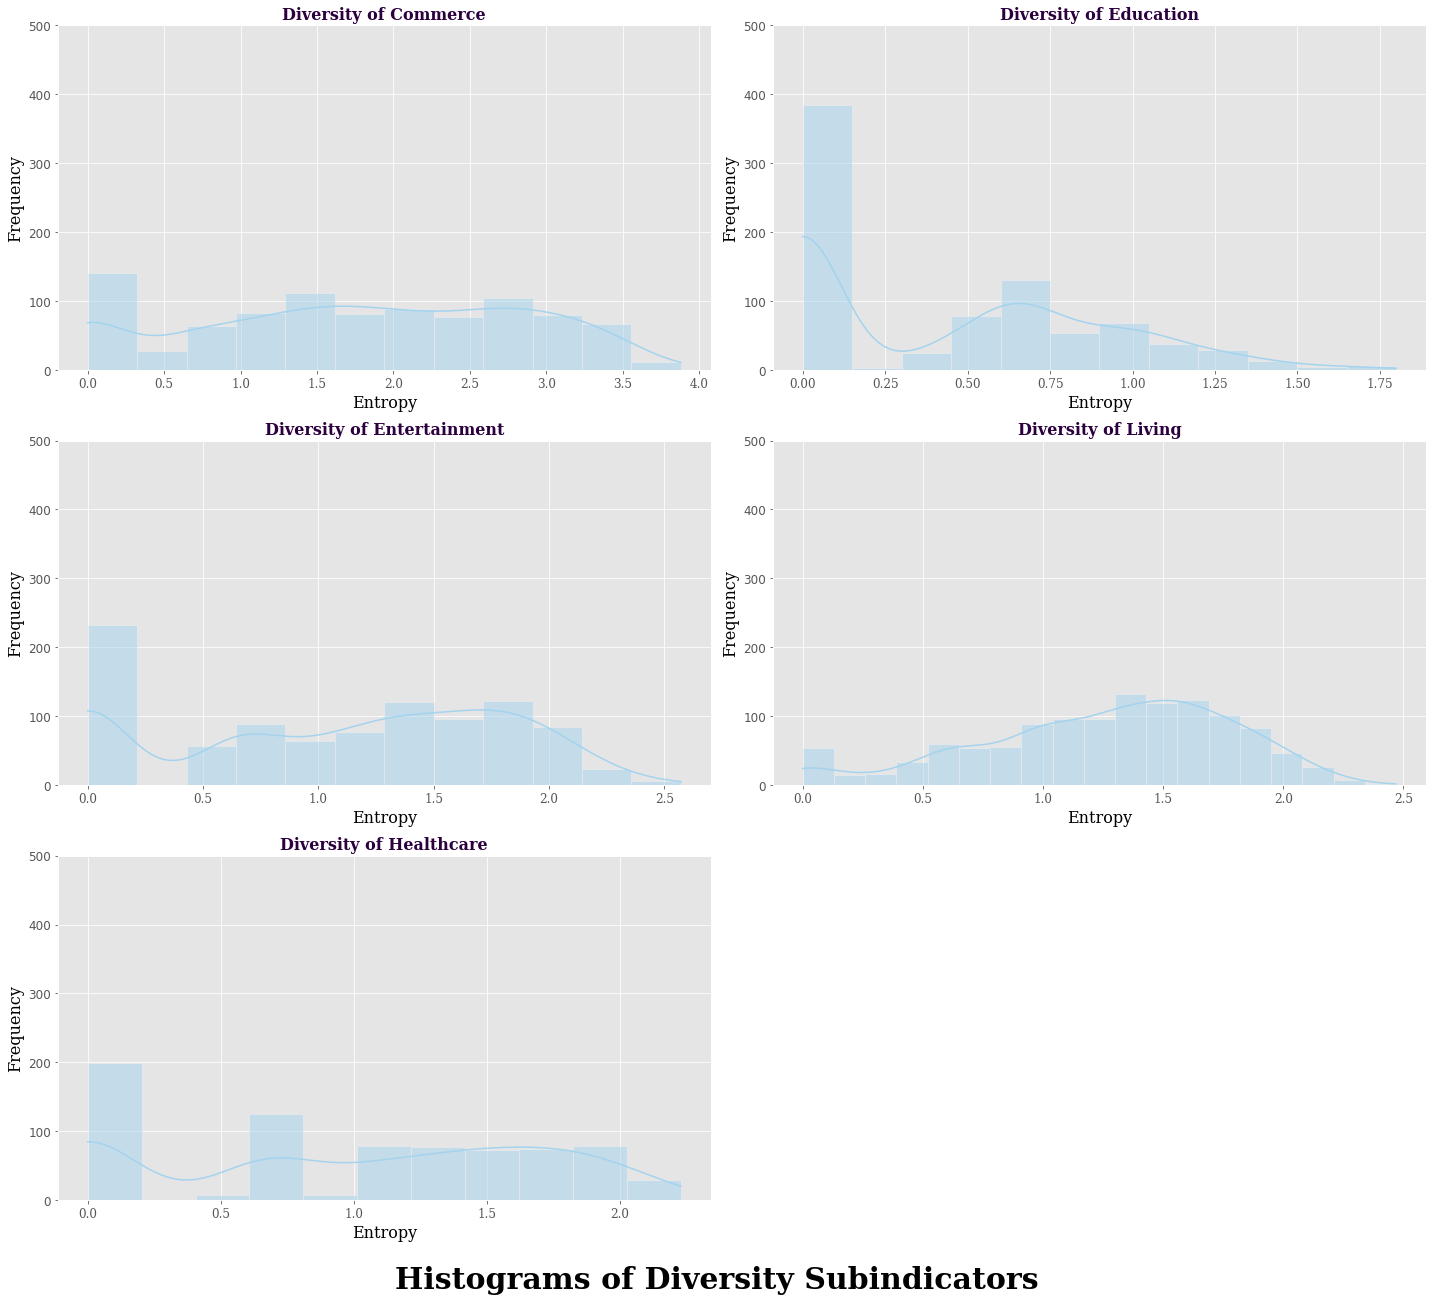

In [6]:
# diversity columns
diversity_cols = data.columns[0:5]

# See distribution of diversity columns
plot_histogram_diversity(data, diversity_cols)

In [20]:
# save the image

def plot_histogram_diversity_save(data, numerical_cols, filename):
    
    # Set font properties for x/y-axis labels
    font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 20}

    fig = plt.figure(figsize=(24, 24), facecolor='white')
    plt.suptitle('Histograms of Diversity Subindicators', fontsize=45, fontname='Serif', fontweight='bold', x=0.5, y=1.02)

    for i in range(len(numerical_cols)):
        ax = plt.subplot(3, 2, i+1)
        sns.histplot(data=data, x=numerical_cols[i], color='#1E90FF', kde=True, ax=ax) # dodgerblue1
        ax.set_xlabel('Entropy', fontdict=font, labelpad=3)  # Increase the labelpad for spacing
        ax.set_ylabel('Frequency', fontdict=font)
        ax.tick_params(axis='x', labelsize=19)  # Adjust x-axis label font size
        ax.tick_params(axis='y', labelsize=19)  # Adjust y-axis label font size
        ax.set_title(numerical_cols[i], color='#2c003e', fontname='Serif', size=28, weight='bold')  # Adjust title font size and weight
        ax.set_ylim(0, 500)  # Set the y-axis limit to 0 and 500
        for tick in ax.get_xticklabels():
            tick.set_fontname("serif")
            tick.set_fontsize(19)  # Adjust x-axis tick label font size

    plt.subplots_adjust(hspace=0.8, wspace=0.3)  # Increase the height spacing between subplots
    plt.tight_layout()
    fig.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close(fig)  # Close the figure to release resources and avoid displaying the plot
    
    
# diversity columns
diversity_cols = data.columns[0:5]

# See distribution of proximity columns and save the plot with filename 'diversity_histogram.png'
plot_histogram_diversity_save(data, diversity_cols, filename='diversity_histogram_500.png')



**Insight**
- The distribution of diversity of living looks most like a normal distribution.
- Throughout the different diversity scores, there are many neighbourhoods which have only one amenity type for a specific urban service category which resulted in 0 diversity score.
- The diversity of commerce is most diverse as expressed by a wider entropy score scale.

#### 2.2.2. Distribution of Proximity Indicators

In [8]:
def plot_histogram_proximity_1(data, numerical_cols):
    # Set font properties for x/y-axis labels
    font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}

    plt.figure(figsize=(20, 18))
    plt.suptitle('Histograms of Proximity Subindicators', fontsize=20, fontname='Serif', fontweight='bold', x=0.5, y=-0.01)

    for i in range(len(numerical_cols)):
        ax = plt.subplot(3, 2, i+1)
        sns.histplot(data=data, x=numerical_cols[i], color='#512b58', kde=True, ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency', fontdict=font)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_title(numerical_cols[i].title(), color='#2c003e', fontname='Serif', size=14)
        ax.set_ylim(0, 500)  # Set the y-axis limit to 0 and 400
        for tick in ax.get_xticklabels():
            tick.set_fontname("serif")
            tick.set_fontsize(12)

    plt.subplots_adjust(hspace=0.6, wspace=0.3)
    plt.tight_layout()
    plt.show()

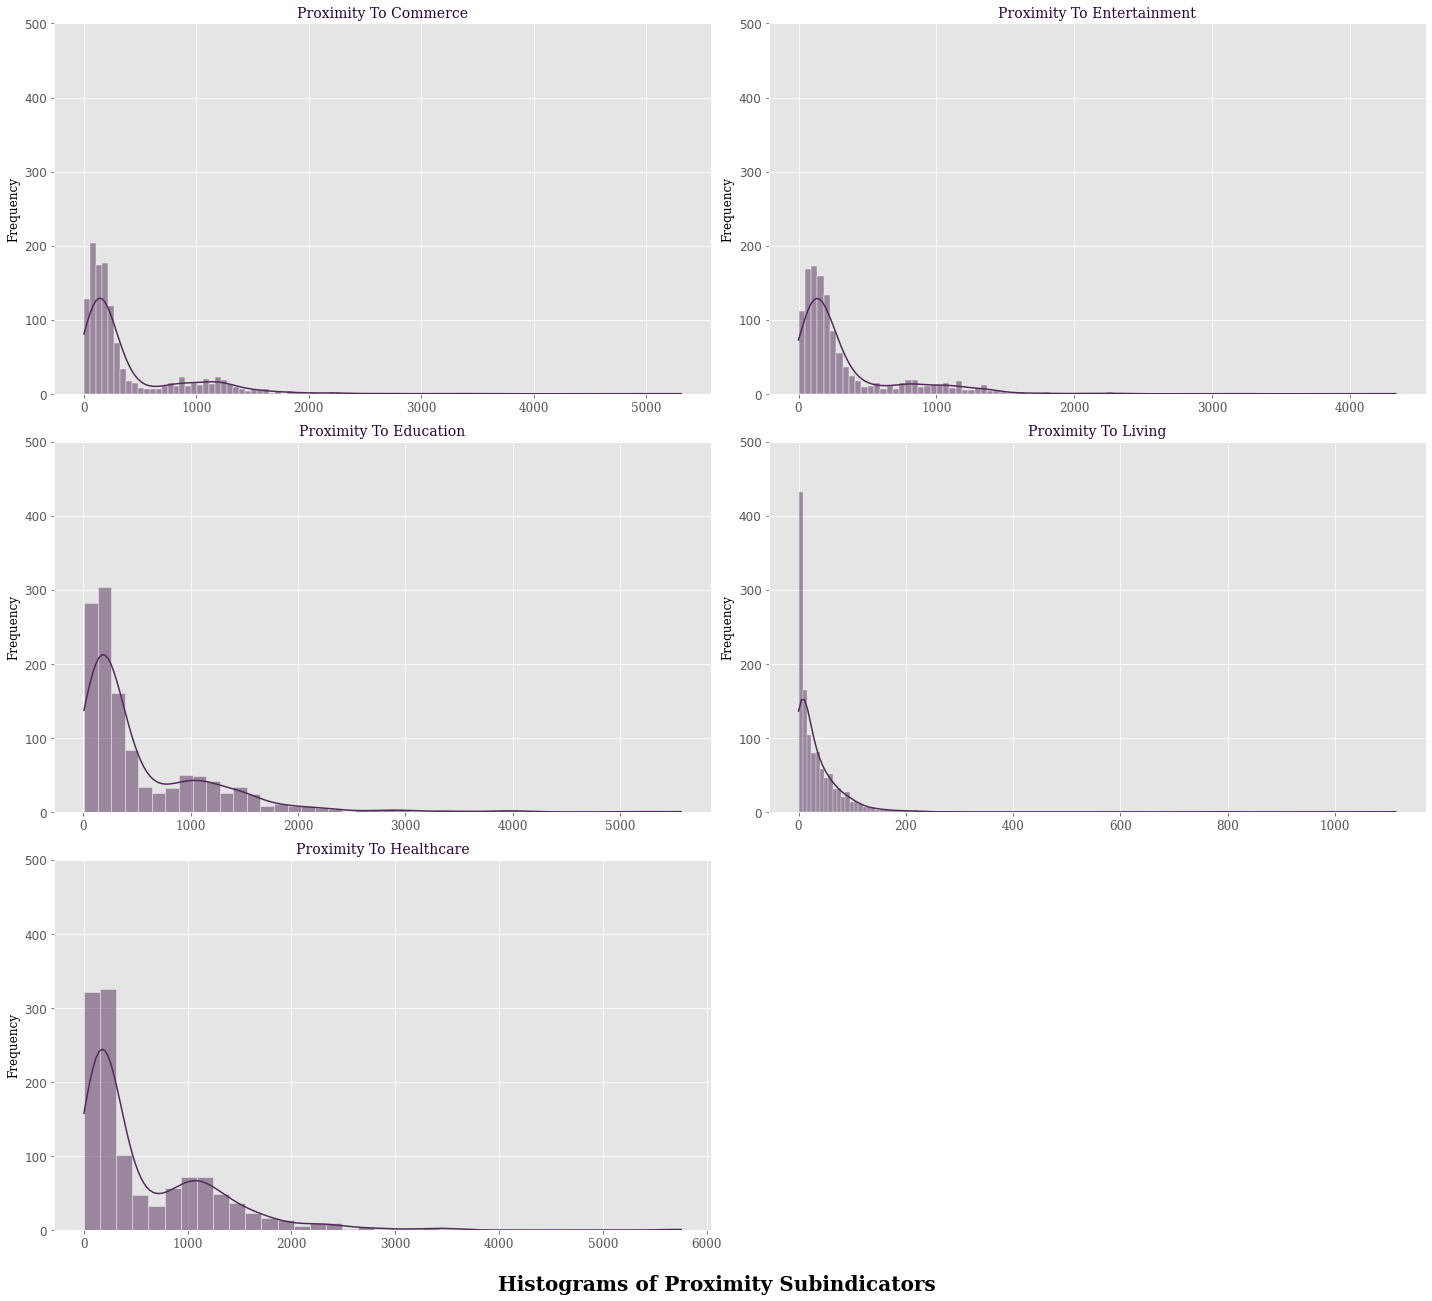

In [9]:
# proximity columns
proximity_cols = data.columns[5:10]

# See distribution of proximity columns
proximity_histograms = plot_histogram_proximity_1(data, proximity_cols)


In [21]:
def plot_histogram_proximity_save(data, numerical_cols, filename):
    # Set font properties for x/y-axis labels
    font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 20}

    fig = plt.figure(figsize=(24, 24), facecolor='white')
    plt.suptitle('Histograms of Proximity Subindicators', fontsize=45, fontname='Serif', fontweight='bold', x=0.5, y=1.02)

    for i in range(len(numerical_cols)):
        ax = plt.subplot(3, 2, i+1)
        sns.histplot(data=data, x=numerical_cols[i], color='#1E90FF', kde=True, ax=ax)
        ax.set_xlabel('Distance (m)', fontdict=font, labelpad=3)  # Increase the labelpad for spacing
        ax.set_ylabel('Frequency', fontdict=font)
        ax.tick_params(axis='x', labelsize=19)  # Adjust x-axis label font size
        ax.tick_params(axis='y', labelsize=19)  # Adjust y-axis label font size
        ax.set_title(numerical_cols[i], color='#2c003e', fontname='Serif', size=28, weight='bold')  # Adjust title font size and weight
        ax.set_ylim(0, 500)  # Set the y-axis limit to 0 and 500
        for tick in ax.get_xticklabels():
            tick.set_fontname("serif")
            tick.set_fontsize(19)  # Adjust x-axis tick label font size

    plt.subplots_adjust(hspace=0.8, wspace=0.3)  # Increase the height spacing between subplots
    plt.tight_layout()
    fig.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close(fig)  # Close the figure to release resources and avoid displaying the plot
    
    
# proximity columns
proximity_cols = data.columns[5:10]

# See distribution of proximity columns and save the plot with filename 'proximity_histogram.png'
plot_histogram_proximity_save(data, proximity_cols, filename='proximity_histogram_500.png')


**Insight**
- The distribution of all proximity indicators are positively skewed.
- Different shapes of distribuiton of indicators should not be a problem as they will be normalised.
- What is crucial is that each dataset gives a reliable way to compare scores between different neighbourhoods for each indicator. 
- The consideration of risk of errors in each dataset is more important.

In [5]:
# read in average footfall data
data = pd.read_csv('/home/jovyan/work/Desktop/UCL/Term 2/UCL Dissertation/Dissertation_R/output/average_shift_rank/avg_sft_lad.csv')
data.head()

,test.x,sum_rank_change,Rs
0,minmax_1_1_1,38,1.1515
1,minmax_1_1_2,54,1.6364
2,minmax_1_2_1,34,1.0303
3,minmax_1_2_2,56,1.6970
4,minmax_1_3_1,30,0.9091


#### 2.2.3. Distribution of Population Density

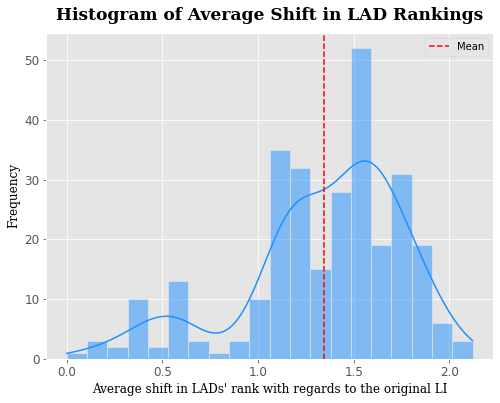

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the 'Rs' column

# Set font properties for x/y-axis labels
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the histogram
sns.histplot(data=data, x='Rs', bins=20, color='#1E90FF', kde=True, ax=ax)

# Calculate the mean value
mean_value = data['Rs'].mean()

# Set the labels and title
ax.set_xlabel("Average shift in LADs' rank with regards to the original LI", fontdict=font)
ax.set_ylabel('Frequency', fontdict=font)
ax.set_title('Histogram of Average Shift in LAD Rankings', fontsize=17, fontname='Serif', fontweight='bold', y=1.02)

# Add a red vertical line at the mean value
ax.axvline(x=mean_value, color='red', linestyle='--', label='Mean')

# Adjust the font size for ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add legend
ax.legend()

# Save the plot as an image file (e.g., PNG, JPEG, PDF, etc.)
plt.savefig('average_shift_lad_rank_histogram_with_line.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


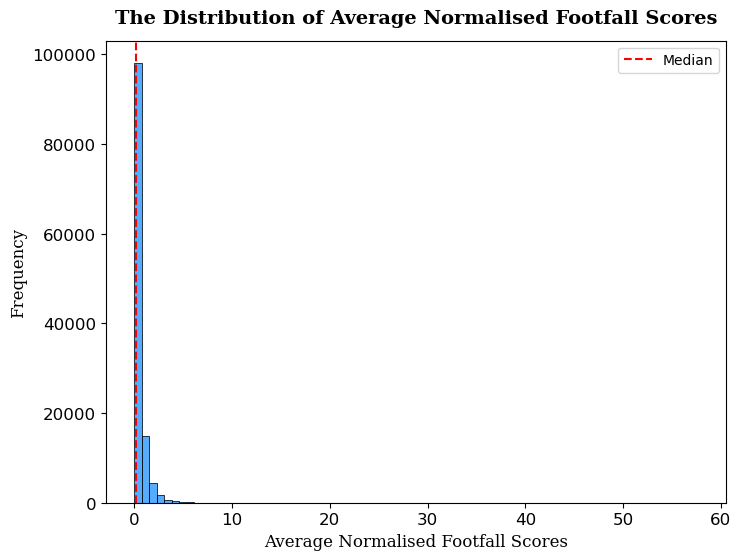

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'pop_density_km2' column

# Set font properties for x/y-axis labels
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}

# Set the Seaborn style to 'whitegrid' temporarily
#sns.set_style('whitegrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the histogram
sns.histplot(data=data, x='average_footfall', bins = 75, color='#1E90FF', kde=False, ax=ax)

# Calculate the mean value
median_value = data['average_footfall'].median()

# Set the labels and title
ax.set_xlabel("Average Normalised Footfall Scores", fontdict=font)
ax.set_ylabel('Frequency', fontdict=font)
ax.set_title('The Distribution of Average Normalised Footfall Scores', fontsize=14, fontname='Serif', fontweight='bold', y=1.02)

# Add a red vertical line at the mean value
ax.axvline(x=median_value, color='red', linestyle='--', label='Median')

# Add legend
ax.legend()

# Adjust the font size for ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Save the plot as an image file (e.g., PNG, JPEG, PDF, etc.)
plt.savefig('average_footfall_histogram_500.png', dpi=300, bbox_inches='tight')

# Reset Seaborn style to default
sns.reset_defaults()


**Insight**
- The distribution of population density is highly positively skewed.
- The absolute majority of neighbourhoods fall to a low population density bound.

## 3. Data Preprocessing

### 3.1. Handling NA values

NA values in diversity indicators will be checked and imputed.

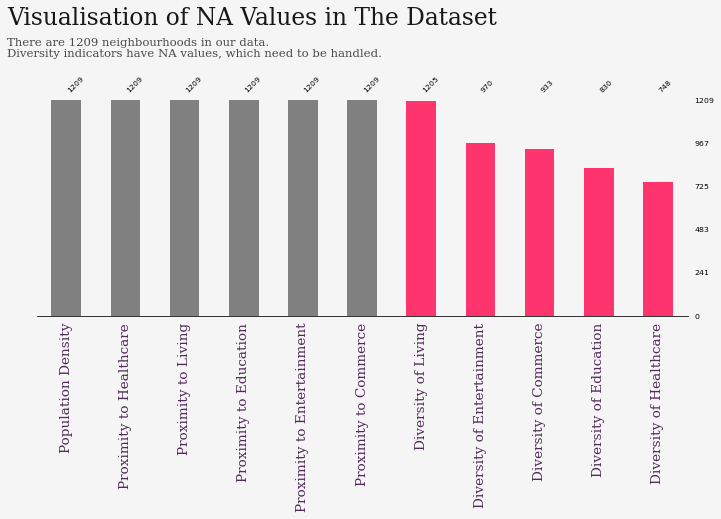

In [32]:
# Visualisation of missing values

# color scheme
color = ['grey','grey','grey','grey','grey','grey','#fe346e','#fe346e','#fe346e','#fe346e','#fe346e']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# displaying bar graphs in a descending order
msno.bar(data, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

# adding texts
ax.text(-1,1.35,'Visualisation of NA Values in The Dataset',{'font': 'Serif', 'size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'There are 1209 neighbourhoods in our data.\nDiversity indicators have NA values, which need to be handled.',{'font': 'Serif', 'size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Serif', 'size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

# Figure numbering
fig.show()

In [22]:
# Replace NA values with -1
data = data.fillna(-1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nb_clus      864 non-null    int64  
 1   d_c          864 non-null    float64
 2   d_edu        864 non-null    float64
 3   d_enter      864 non-null    float64
 4   d_h          864 non-null    float64
 5   d_l          864 non-null    float64
 6   p_edu        864 non-null    float64
 7   p_h          864 non-null    float64
 8   p_c          864 non-null    float64
 9   p_enter      864 non-null    float64
 10  p_l          864 non-null    float64
 11  pop_density  864 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 81.1 KB


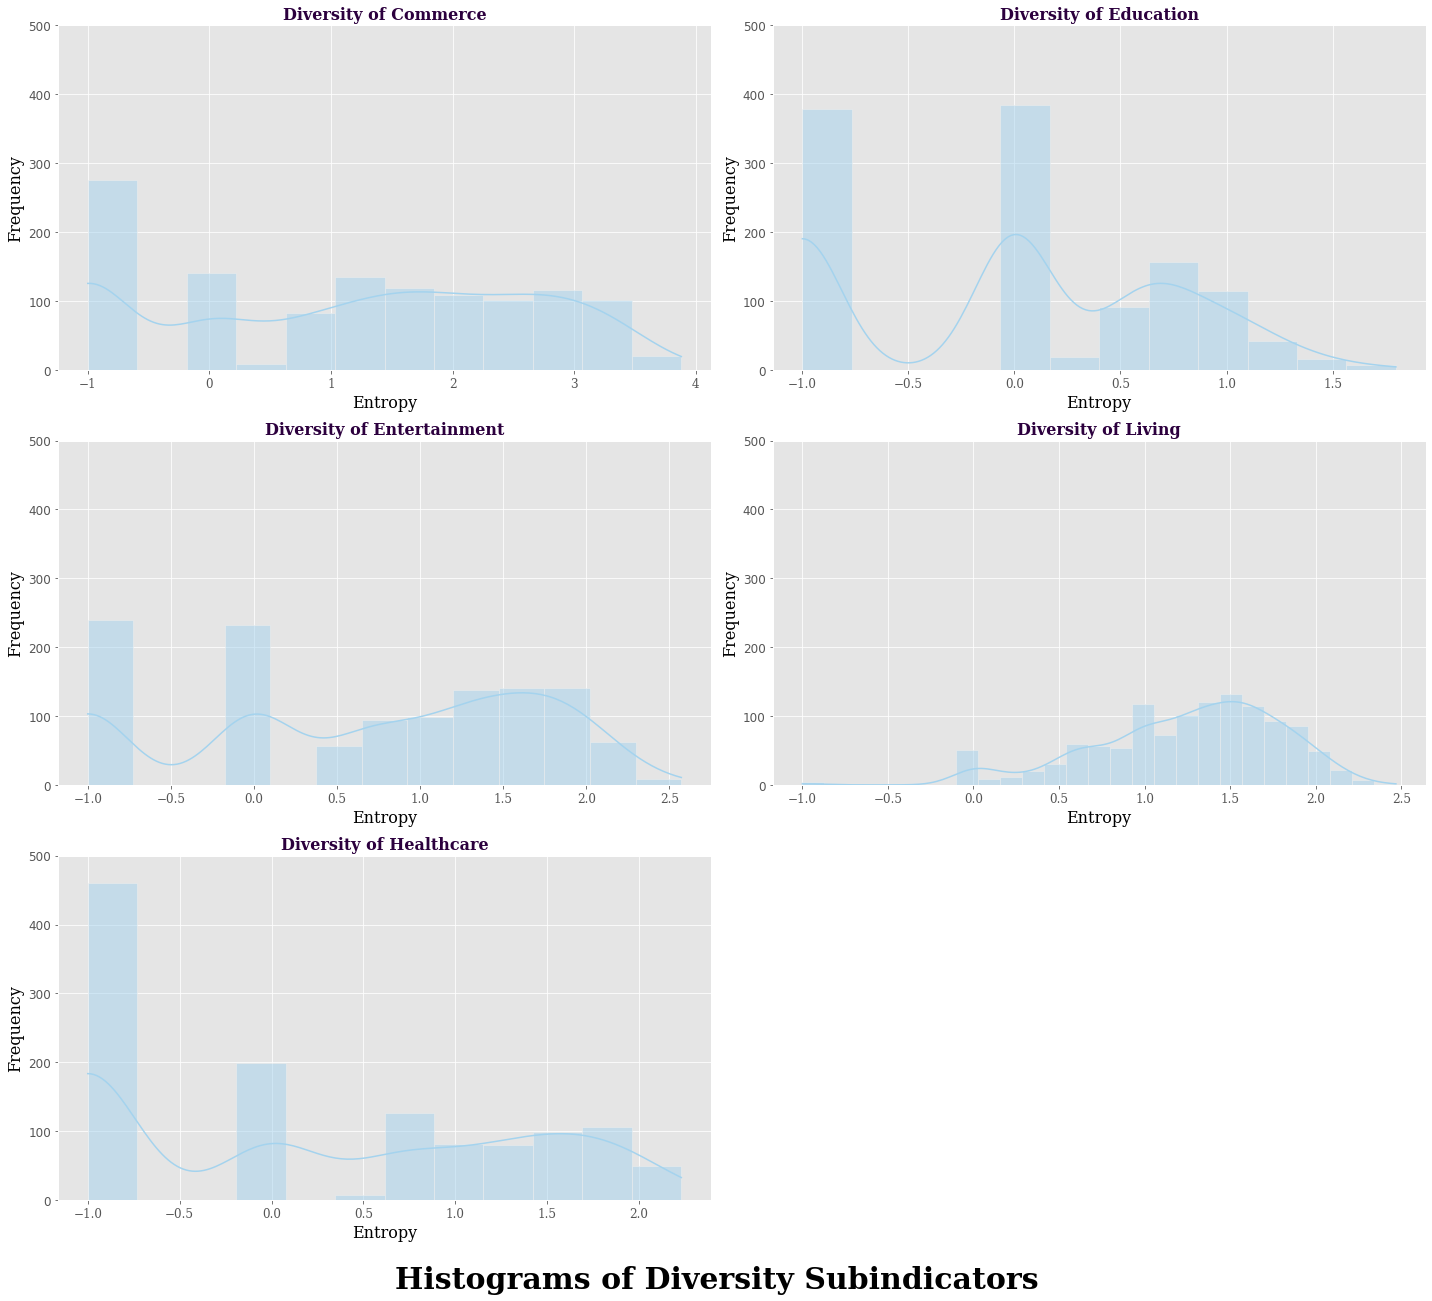

In [13]:
# diversity columns
diversity_cols = data.columns[0:5]

# See distribution of diversity columns
plot_histogram_diversity(data, diversity_cols)

In [23]:
# save the image

def plot_histogram_diversity_save(data, numerical_cols, filename):
    # Set font properties for x/y-axis labels
    font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 20}

    fig = plt.figure(figsize=(24, 24), facecolor='white')
    plt.suptitle('Histograms of Diversity Subindicators', fontsize=45, fontname='Serif', fontweight='bold', x=0.5, y=1.02)

    for i in range(len(numerical_cols)):
        ax = plt.subplot(3, 2, i+1)
        sns.histplot(data=data, x=numerical_cols[i], color='#1E90FF', kde=True, ax=ax)
        ax.set_xlabel('Entropy', fontdict=font, labelpad=3)  # Increase the labelpad for spacing
        ax.set_ylabel('Frequency', fontdict=font)
        ax.tick_params(axis='x', labelsize=19)  # Adjust x-axis label font size
        ax.tick_params(axis='y', labelsize=19)  # Adjust y-axis label font size
        ax.set_title(numerical_cols[i], color='#2c003e', fontname='Serif', size=28, weight='bold')  # Adjust title font size and weight
        ax.set_ylim(0, 500)  # Set the y-axis limit to 0 and 500
        for tick in ax.get_xticklabels():
            tick.set_fontname("serif")
            tick.set_fontsize(19)  # Adjust x-axis tick label font size

    plt.subplots_adjust(hspace=0.8, wspace=0.3)  # Increase the height spacing between subplots
    plt.tight_layout()
    fig.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close(fig)  # Close the figure to release resources and avoid displaying the plot
    
    
# diversity columns
diversity_cols = data.columns[0:5]

# See distribution of proximity columns and save the plot with filename 'diversity_histogram.png'
plot_histogram_diversity_save(data, diversity_cols, filename='diversity_histogram_imputed_500.png')

**Insight**
- The NA values in diversity indicators have been replaced with -1.

- This imputation can differentiate the neighbourhoods with no amenity for a certain urban service category from the neighbourhoods with only one amenity type for a certain urban service category. As diversity score '0' is an artefact of the Shannon's entropy calculation which cannot account for a case when there is no amenities at all.

- We can see that whilst a small number of neighbourhoods do not have living service related amenities, there are many neighbourhoods which do not contain healthcare and education related amenities.

## 4. Multivariate Analysis

### 4.1. Correlation map

Correlation map provides a numerical representation of correlation between indicators. However, it is important to bear in mind that correlation does not imply causation.

In [11]:
# read in data
data = pd.read_csv('/home/jovyan/work/Desktop/UCL/Term 2/UCL Dissertation/Dissertation_R/data/final_data/final_500.csv')
data.head(1)

,nb_clus,d_c,d_edu,d_enter,d_l,d_h,p_c,p_enter,p_edu,p_l,p_h,pop_density
0,9,0.0000,1.3297,0.6931,1.8499,-1.0000,306.0941,276.0602,168.4851,39.4164,"1,686.3080","6,361.3602"


In [12]:
# Drop nb_clus column - unnecessary columns
data.drop('nb_clus', axis=1, inplace=True)
# Rename columns
data.rename(columns={'d_c': 'Diversity of Commerce',  'd_edu': 'Diversity of Education', 
                     'd_enter': 'Diversity of Entertainment', 'd_l': 'Diversity of Living',
                     'd_h': 'Diversity of Healthcare', 'p_c': 'Proximity to Commerce',
                    'p_edu': 'Proximity to Education', 'p_enter': 'Proximity to Entertainment',
                    'p_l': 'Proximity to Living', 'p_h': 'Proximity to Healthcare', 'pop_density':'Population Density'}, inplace=True)

In [13]:
data.columns

Index(['Diversity of Commerce', 'Diversity of Education',
       'Diversity of Entertainment', 'Diversity of Living',
       'Diversity of Healthcare', 'Proximity to Commerce',
       'Proximity to Entertainment', 'Proximity to Education',
       'Proximity to Living', 'Proximity to Healthcare', 'Population Density'],
      dtype='object')

/tmp/ipykernel_97/2429538111.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


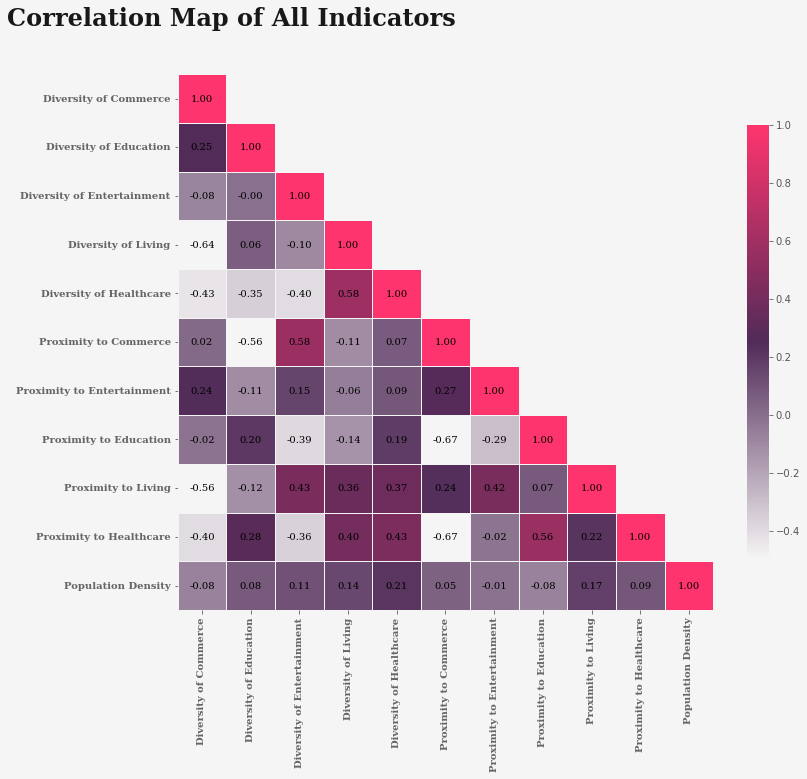

In [6]:
# correlation map for all the features
np.random.seed(42)

df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask[np.diag_indices_from(mask)] = False

fig, ax = plt.subplots(figsize = (12,16))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

colors = ['#f6f5f5','#512b58','#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# plot heatmap
sns.heatmap(df_corr, mask=mask, annot=True, fmt=".2f",cmap = colormap,
           vmin=-0.5, vmax=1.0, cbar_kws={"shrink": .5, }, ax = ax, cbar = True,
           linewidth = 1,linecolor = '#f6f5f5', square = True,annot_kws = {'font':'serif', 'size':10, 'color':'black'} )


# yticks
ax.tick_params(axis = 'y', rotation=0)
xticks = ['Diversity of Commerce', 'Diversity of Education', 'Diversity of Entertainment', 'Diversity of Living', 'Diversity of Healthcare', 
          'Proximity to Commerce', 'Proximity to Entertainment', 'Proximity to Education', 'Proximity to Living', 'Proximity to Healthcare', 
          'Population Density']
yticks = ['Diversity of Commerce', 'Diversity of Education', 'Diversity of Entertainment', 'Diversity of Living', 'Diversity of Healthcare', 
          'Proximity to Commerce', 'Proximity to Entertainment', 'Proximity to Education', 'Proximity to Living', 'Proximity to Healthcare', 
          'Population Density']

ax.set_xticklabels(xticks, fontdict={'font': 'Serif', 'size': 10, 'weight': 'bold'}, rotation=90, alpha=0.9)
ax.set_yticklabels(yticks, fontdict={'font': 'Serif', 'size': 10, 'weight': 'bold'}, rotation=0, alpha=0.9)

ax.text(-3.5,-1.0, 'Correlation Map of All Indicators',{'font':'serif', 'size': 24, 'weight':'bold'}, alpha = 0.9)
#ax.text(-3.5,-0.405, 'A Glance on correlation for preprocessed data.',{'font':'serif', 'size': 12, 'weight':'normal'}, alpha = 0.8)

fig.show()
fig.savefig("correlation_map.png", dpi=300, bbox_inches='tight')

**Insight**
- Strong positive correlation can be observed between all diversity scores. The strongest (0.78) can be seen between `d_h` and `d_c`. The strong correlation between diversity indicators might indicate that the agglomeration of amenities. The vibrant, diverse and mixed urban amenity neighbourhood might attract more amenity types. 

- The indicators with a strong correlation can be grouped together by using PCA. If two collinear indicators are included in the final composite index, this could cause double counting issues. Thus, reducing the dimensions could be a good solution.

- A wide range of negative correlation can be identified between diversity and proximity scores (-0.70 to 0.01). This might indicate that there is a potential trade-off between the closeness of urban services and the variety of services available in different neighborhoods. For example, in some areas, there might be a concentration of specific urban services (e.g., commercial centers, healthcare facilities, or educational institutions) that serve multiple neighborhoods within close proximity. As a result, these neighborhoods may have limited diversity in terms of the types of services available because they rely heavily on the nearby concentrated services.

- Not all proximity scores show a positive correlation, which might be attributed to spatial distribution. Different urban services may have unique spatial patterns based on historical development, land use zoning, and economic factors. For example, healthcare facilities may be strategically located near hospitals, while commercial establishments may concentrate in business districts. Yet, a strong positive correlation can be observed between `p_edu` and `p_h`.

### 4.2. PCA

We have seen that some indicators in diversity are highly correlated. These indicators could be explained by a few Principal Components.
PCA will allow for understanding underlying nature of data structure.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
# extract diversity related indicators
div_cols = ['d_l', 'd_c', 'd_enter', 'd_edu', 'd_h']
diversity = data[div_cols]

**Standardising data**

In [41]:
# data standardisation
ss = StandardScaler()

# extract values
x = diversity.values

# save the standardised data to a variable x
x = ss.fit_transform(x)

# show the first 5 rows of standardised data
pd.DataFrame(x, columns=div_cols).head()

,d_l,d_c,d_enter,d_edu,d_h
0,1.1146,-0.7490,0.0375,1.7550,-1.0992
1,-1.2098,-1.4191,-1.5740,0.0190,-0.2023
2,0.2976,0.8065,1.0275,1.9449,0.4193
3,0.0543,-0.3225,0.4234,-1.2865,-1.0992
4,0.8497,0.4223,-0.6222,0.0190,-0.2023


**PCA**

In [43]:
# decide on the number of n_components
pca = PCA(n_components = 5)

printcipalComponents = pca.fit_transform(x)

# dataframe consists of PC
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principalDf.head()

,PC1,PC2,PC3,PC4,PC5
0,0.3063,-1.2150,1.6506,-1.3409,0.0199
1,-1.9588,0.4607,1.1505,0.6100,-0.5011
2,2.0060,0.4358,0.9456,-0.7989,0.0831
3,-1.0113,-0.4689,-1.1796,-0.7110,0.1014
4,0.1478,-0.7954,0.1782,0.3409,0.7255


In [44]:
# percentage of total variance explained by each PCA
pca.explained_variance_ratio_

array([0.69959748, 0.11586292, 0.09266482, 0.05158174, 0.04029305])

In [45]:
# Eigenvalues of each principal component
eigenvalues = pca.explained_variance_
eigenvalues

array([3.50088307, 0.57979416, 0.46370763, 0.25812218, 0.20163203])

In [46]:
# Correlation of each indicator with the principal components
correlation_with_pcs = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(5)], index=diversity.columns)
correlation_with_pcs

,PC1,PC2,PC3,PC4,PC5
d_l,0.3809,-0.9201,-0.0319,0.0513,0.0686
d_c,0.4780,0.2721,-0.2514,0.1234,0.7868
d_enter,0.4645,0.1447,-0.4662,-0.6326,-0.3819
d_edu,0.4264,0.1319,0.8472,-0.2879,0.0112
d_h,0.4785,0.2026,-0.0259,0.7065,-0.4798


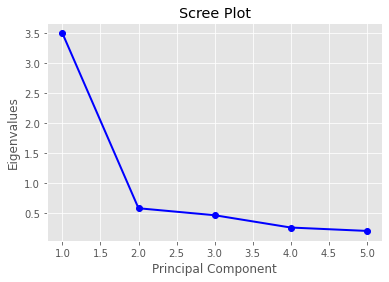

In [47]:
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

We can see that `PC1` and `PC2` can explain over 80% of total variance.

In [3]:
# read in average shift in mean rank data
data = pd.read_csv('/home/jovyan/work/Desktop/UCL/Term 2/UCL Dissertation/Dissertation_R/avg_sft_lad.csv')
data.head(1)

,test.x,sum_rank_change,Rs
0,minmax_1_1_1,38,1.1515


In [6]:
print("The mean value of average shift in LADs' Rank is " + str(np.mean(data.Rs)))
print("The standard deviation of average shift in LADs' Rank is " + str(np.std(data.Rs)))

The mean value of average shift in LADs' Rank is 1.3444865319865273
The standard deviation of average shift in LADs' Rank is 0.415544042107145


In [8]:
mean_Rs = data['Rs'].mean()
mean_Rs

1.3444865319865273

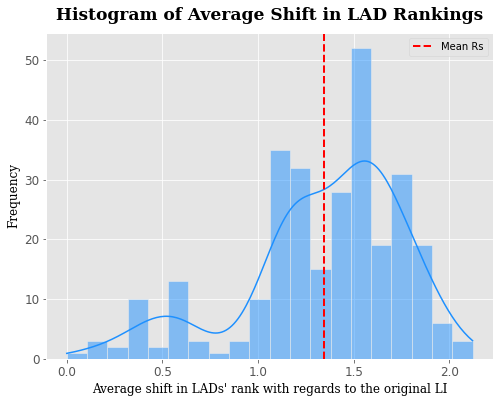

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'pop_density_km2' column

# Set font properties for x/y-axis labels
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}

# Set the Seaborn style to 'whitegrid' temporarily
#sns.set_style('whitegrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the histogram
sns.histplot(data=data, x='Rs', bins=20, color='#1E90FF', kde=True, ax=ax)

# Calculate the mean value of Rs
mean_Rs = data['Rs'].mean()

# Add vertical line for the mean value of Rs
ax.axvline(x=mean_Rs, color='red', linestyle='dashed', linewidth=2, label='Mean Rs')

# Set the labels and title
ax.set_xlabel("Average shift in LADs' rank with regards to the original LI", fontdict=font)
ax.set_ylabel('Frequency', fontdict=font)
ax.set_title('Histogram of Average Shift in LAD Rankings', fontsize=17, fontname='Serif', fontweight='bold', y=1.02)

# Adjust the font size for ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add legend
ax.legend()

# Save the plot as an image file (e.g., PNG, JPEG, PDF, etc.)
plt.savefig('average_shift_lad_rank_histogram_500.png', dpi=300, bbox_inches='tight')

# Reset Seaborn style to default
sns.reset_defaults()

